[*********************100%***********************]  1 of 1 completed


Price              Close         EMA12         EMA26       MACD     Signal
Ticker             ^NSEI                                                  
Date                                                                      
2022-01-03  17625.699219  17625.699219  17625.699219   0.000000   0.000000
2022-01-04  17805.250000  17653.322416  17638.999277  14.323139   2.864628
2022-01-05  17925.250000  17695.157429  17660.203034  34.954395   9.282581
2022-01-06  17745.900391  17702.964038  17666.550986  36.413052  14.708675
2022-01-07  17812.699219  17719.846374  17677.376781  42.469593  20.260859


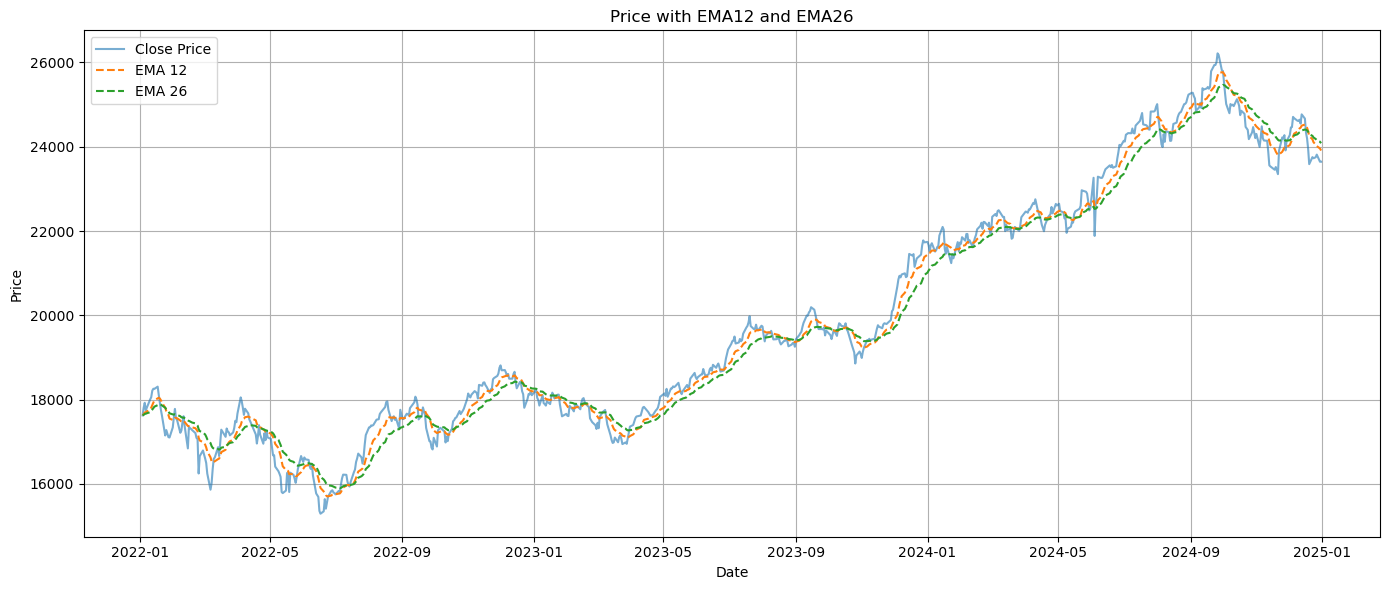

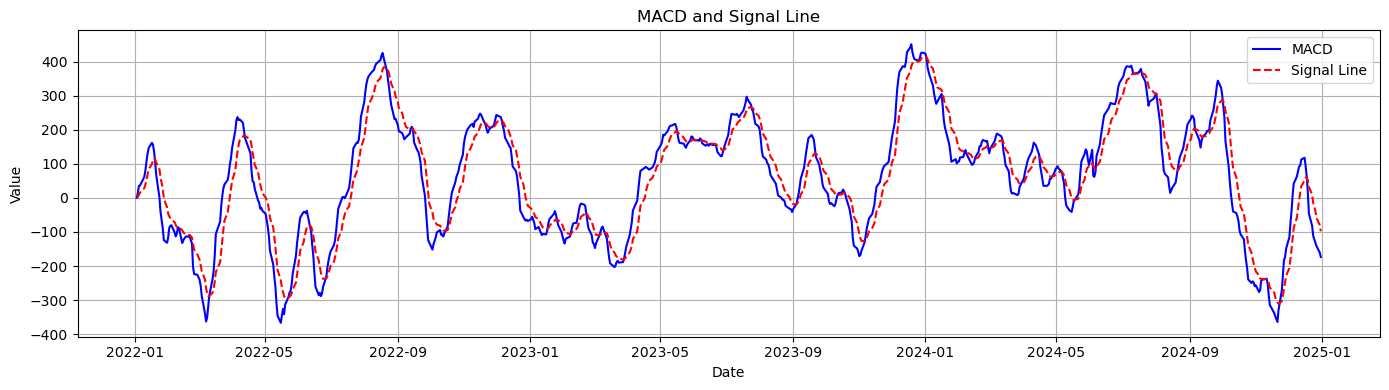

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


def download_stock_data(ticker='^NSEI', start='2022-01-01', end='2025-01-01'):
    """Download historical stock/index data from Yahoo Finance."""
    data = yf.download(ticker, start=start, end=end)
    return data


def compute_ema_macd(data):
    """Calculate EMA12, EMA26, MACD and Signal Line."""
    data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA12'] - data['EMA26']
    data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
    return data.dropna()


def plot_price_with_ema(data):
    """Plot Close Price along with EMA12 and EMA26."""
    plt.figure(figsize=(14, 6))
    plt.plot(data['Close'], label='Close Price', alpha=0.6)
    plt.plot(data['EMA12'], label='EMA 12', linestyle='--')
    plt.plot(data['EMA26'], label='EMA 26', linestyle='--')
    plt.title('Price with EMA12 and EMA26')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_macd(data):
    """Plot MACD and Signal Line."""
    plt.figure(figsize=(14, 4))
    plt.plot(data['MACD'], label='MACD', color='blue')
    plt.plot(data['Signal'], label='Signal Line', color='red', linestyle='--')
    plt.title('MACD and Signal Line')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Main execution
if __name__ == "__main__":
    df = download_stock_data()
    df = compute_ema_macd(df)
    print(df[['Close', 'EMA12', 'EMA26', 'MACD', 'Signal']].head())
    plot_price_with_ema(df)
    plot_macd(df)


In [8]:
def download_stock_data(ticker='INFY.NS', start='2022-01-01', end='2025-01-01'):
    data = yf.download(ticker, start=start, end=end)
    
    # Flatten columns if MultiIndex
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = ['_'.join(col).strip() for col in data.columns.values]

    # Rename to standard format
    data = data.rename(columns={
        'Open': 'Open',
        'High': 'High',
        'Low': 'Low',
        'Close': 'Close',
        'Adj Close': 'Adj_Close',
        'Volume': 'Volume'
    })

    return data


In [9]:
import yfinance as yf
import pandas as pd
from backtesting import Backtest, Strategy

# 1. Download data
data = yf.download('^NSEI', start='2022-01-01', end='2025-01-01')

# 2. Fix MultiIndex: flatten it so that columns are single level
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)

# 3. Make sure required columns are present
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Missing required column: {col}")

# 4. Define SMA function
def SMA(values, n):
    return pd.Series(values).rolling(n).mean().values

# 5. Define the strategy
class SMACrossoverStrategy(Strategy):
    n1 = 10
    n2 = 20

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        if self.sma1[-1] > self.sma2[-1] and self.sma1[-2] <= self.sma2[-2]:
            self.buy()
        elif self.sma1[-1] < self.sma2[-1] and self.sma1[-2] >= self.sma2[-2]:
            self.sell()

# 6. Run the backtest
bt = Backtest(data, SMACrossoverStrategy, cash=100000, commission=0.001)
stats = bt.run()
bt.plot()
print(stats)


[*********************100%***********************]  1 of 1 completed


Backtest.run:   0%|          | 0/719 [00:00<?, ?bar/s]

C:\Users\visha\anaconda3\Lib\site-packages\backtesting\backtesting.py:954: UserWarning: time=74: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
C:\Users\visha\anaconda3\Lib\site-packages\backtesting\backtesting.py:954: UserWarning: time=101: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
C:\Users\visha\anaconda3\Lib\site-packages\backtesting\backtesting.py:954: UserWarning: time=112: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
C:\Users\visha\anaconda3\Lib\site-packages\backtesting\backtesting.py:954: UserWarning: time=127: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
C:\Users\visha\anaconda3\Lib\site-packages\backtesting\backtesting.py:954: UserWarning: time=166: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
C:\Users\visha\anaconda3\Lib\site-packages\backtesting\backtesting.py:954: UserWa

Start                     2022-01-03 00:00:00
End                       2024-12-31 00:00:00
Duration                   1093 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                 131111.72475
Equity Peak [$]                  143967.97475
Return [%]                           31.11172
Buy & Hold Return [%]                36.36105
Return (Ann.) [%]                     9.67709
Volatility (Ann.) [%]                12.30606
CAGR [%]                               6.4445
Sharpe Ratio                          0.78637
Sortino Ratio                         1.22866
Calmar Ratio                          0.72339
Alpha [%]                             5.10803
Beta                                  0.71515
Max. Drawdown [%]                   -13.37748
Avg. Drawdown [%]                     -1.9706
Max. Drawdown Duration      197 days 00:00:00
Avg. Drawdown Duration       23 days 00:00:00
# Trades                                    0
Win Rate [%]                      